In [6]:
import pandas as pd
import numpy as np
from scipy import stats

dataset=pd.read_csv('updated_leeds_center_air_quality_2022.csv',parse_dates=['Date'])
dataset_PM25 = dataset['PM2.5']
dataset_PM10 = dataset['PM10']
#find variance foreach group
var_PM25, var_PM10 =np.var(dataset_PM25),np.var(dataset_PM10)
ratio= max(var_PM25,var_PM10)/min(var_PM25,var_PM10)
print("The varience ratio is:",ratio)

alpha=0.05
#perform two sample t-test with equal variences
t2, p=stats.ttest_ind(a=dataset_PM25,b=dataset_PM10,equal_var=True)
print("p value ={:g}".format(p))
print("t value ={:g}".format(t2))

if p< alpha: #null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis is accepted")

The varience ratio is: 1.9802538748982859
p value =1.59321e-285
t value =-36.813
The null hypothesis can be rejected


**ROI2.2**

In [9]:
import pandas as pd
import numpy as np
from scipy import stats

dataset=pd.read_csv('updated_leeds_center_air_quality_2022.csv',parse_dates=['Date'])
df =pd.DataFrame(dataset,columns=['Date','PM2.5'])

dg= df.groupby(pd.Grouper(key='Date',freq='1M')).mean()# groupby each 1 month
dg.index = dg.index.strftime('%B')

fvalue,pvalue = stats.f_oneway(df['PM2.5'][df['Date'].dt.month==1],
                                  df['PM2.5'][df['Date'].dt.month==2],
                                  df['PM2.5'][df['Date'].dt.month==3],
                                  df['PM2.5'][df['Date'].dt.month==4],
                                  df['PM2.5'][df['Date'].dt.month==5],
                                  df['PM2.5'][df['Date'].dt.month==6],
                                  df['PM2.5'][df['Date'].dt.month==7],
                                  df['PM2.5'][df['Date'].dt.month==8],
                                  df['PM2.5'][df['Date'].dt.month==9],
                                  df['PM2.5'][df['Date'].dt.month==10],
                                  df['PM2.5'][df['Date'].dt.month==11],
                                  df['PM2.5'][df['Date'].dt.month==12])

print("F value ={:g}".format(fvalue))
print("P value ={:g}".format(pvalue))

alpha=0.05
if pvalue< alpha: #null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis is accepted")

F value =184.94
P value =0
The null hypothesis can be rejected


**ROI 2.3**




pearson Standard Correlation Coefficient Matrix
                O3        NO       NO2  ...     M_DIR   M_SPEED    M_TEMP
O3        1.000000 -0.444456 -0.634807  ... -0.078685  0.354071  0.392962
NO       -0.444456  1.000000  0.619532  ...  0.030941 -0.184160 -0.201054
NO2      -0.634807  0.619532  1.000000  ...  0.028921 -0.301965 -0.336453
NOXasNO2 -0.579595  0.932108  0.861403  ...  0.033440 -0.257931 -0.284687
SO2       0.076933  0.219342  0.219480  ... -0.041525 -0.060381 -0.002516
CO       -0.527612  0.485242  0.558768  ...  0.064610 -0.126818 -0.216277
PM10     -0.252106  0.401936  0.544331  ... -0.132582 -0.254361 -0.145790
PM2.5    -0.348185  0.385555  0.509046  ... -0.146194 -0.293300 -0.249203
M_DIR    -0.078685  0.030941  0.028921  ...  1.000000  0.123830 -0.053031
M_SPEED   0.354071 -0.184160 -0.301965  ...  0.123830  1.000000  0.104836
M_TEMP    0.392962 -0.201054 -0.336453  ... -0.053031  0.104836  1.000000

[11 rows x 11 columns]




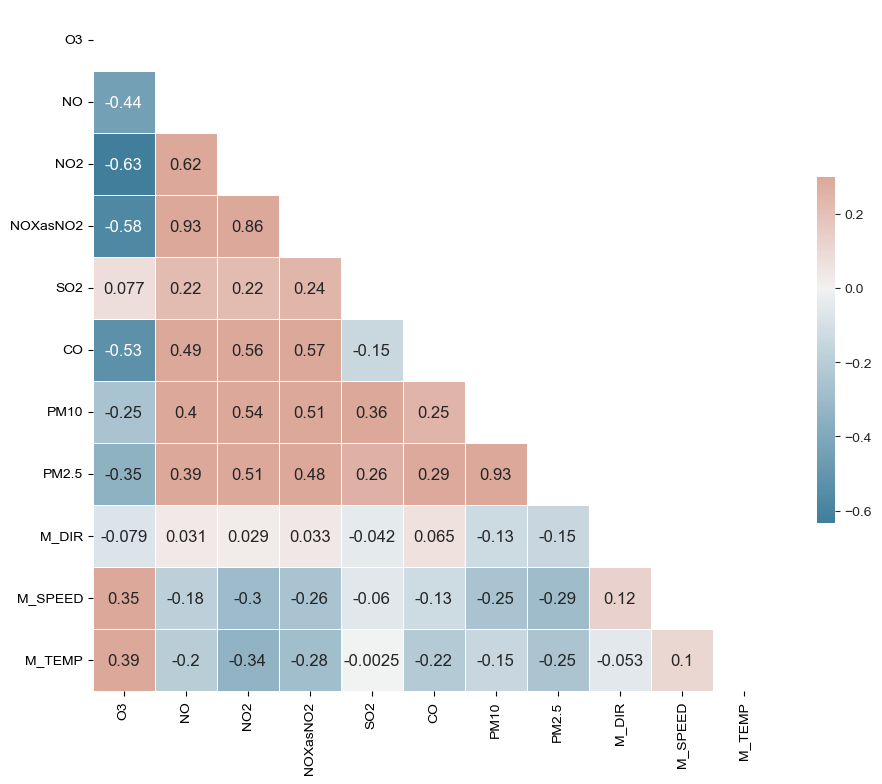

In [11]:
# pearson correlation
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dataset = pd.read_csv('updated_leeds_center_air_quality_2022.csv', parse_dates=['Date'])
correlation = dataset.corr()
print("\n")
print("pearson Standard Correlation Coefficient Matrix")
print(correlation)
print("\n")

# generate a Mask for the upper the upper triangle
mask = np.triu(np.ones_like(correlation, dtype=bool))

# setup a seaborn matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

sns.set_style("white")

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with mask and correct aspect ratio
heatmap = sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=.3, center=0,
                      square=True, linewidths=0.5, cbar_kws={"shrink" : 0.5},
annot = True, annot_kws = {"size": 12})
# add ticks for labels
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

# Export heatmap as an Image
heatmap.get_figure().savefig('heatmap_diabetes', bbox_inches='tight')



